In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from pylab import rcParams

rcParams['figure.subplot.wspace'] = 0.8
rcParams['figure.subplot.hspace'] = 0.6
rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False
rcParams['font.size'] = 10
rcParams['axes.titlesize'] = 10
rcParams['axes.labelsize'] = 10
rcParams['xtick.labelsize'] = 7
rcParams['ytick.labelsize'] = 7
rcParams['legend.frameon'] = False

rcParams['figure.subplot.wspace'] = 0.8
rcParams['figure.subplot.hspace'] = 0.6
rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False
rcParams['font.size'] = 8
rcParams['axes.titlesize'] = 9
rcParams['axes.labelsize'] = 8
rcParams['xtick.labelsize'] = 7
rcParams['ytick.labelsize'] = 7
rcParams['legend.frameon'] = False

plt.rcParams['svg.fonttype'] = 'none'

['trad_80_N', 'FL_N', 'FLT_N', 'FI_N', 'FL_SCL', 'FL_SCLT']


/home/mhennig/anaconda3/envs/idp/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


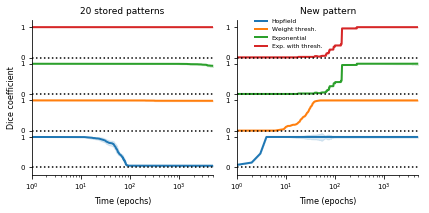

In [78]:

filename = '../Single2_errors_stored6_size10_spars0.1_epochs2000_eta0.1_ALL.npz'
# filename = '../Single_errors_stored6_size10_spars0.1_epochs2000_eta0.1_ALL.npz'
# filename = '../Single_errors_stored6_size10_spars0.1_epochs2000_eta0.1_ALL.npz'
filename = '../Single_errors_stored6_size10_spars0.1_epochs2000_eta0.1_ALL.npz'
filename = '../Single_errors_stored6_size10_spars0.1_epochs5000_eta0.1_ALL.npz'
# filename = '../Single_errors_stored6_size10_spars0.1_epochs5000_eta0.001_ALL.npz'
# filename = '../Single_errors_stored6_size10_spars0.1_epochs5000_eta0.01_ALL.npz'
filename = '../Single_errors_stored6_size10_spars0.1_epochs5000_eta0.01_ALL.npz'
filename = '../Single_errors_stored21_size10_spars0.1_epochs5000_eta0.01_ALL.npz'
filename = '../Single_errors_stored21_size10_spars0.1_epochs5000_eta0.01_ALL.npz'
data = np.load(filename)
print(data.keys())


# plt.figure(figsize=(10,2*2.5))
plt.figure(figsize=(6,3))

show_exps = range(len(data.keys()))
show_exps = [0,2,4,5]
exp_names = ['Hopfield','Weight thresh.','Exponential','Exp. with thresh.']
# show_exps = [5,4,2,0]
colors = plt.cm.tab10.colors #plt.cm.hsv(np.arange(len(show_exps))/len(show_exps))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)#,sharey=ax1)
for i,j in enumerate(show_exps):
    k = data.keys()[j]
#     ax1.subplot(121)
    mean_over_p = np.mean(data[k][:, :, :-1],axis = 2)
    mean_over_trials = np.mean(mean_over_p,axis = 0)
    sd_over_trials = np.std(mean_over_p,axis = 0)
    ax1.semilogx(np.arange(1,len(mean_over_trials)+1),mean_over_trials+i*1.2, c=colors[i], lw=2)
#     plt.plot(np.arange(1,len(mean_over_trials)+1),mean_over_trials, c=colors[j], lw=2)
#     edges = np.percentile(mean_over_p, [25, 75], axis=0)
    edges = np.vstack((mean_over_trials-sd_over_trials, mean_over_trials+sd_over_trials))
    ax1.fill_between(np.arange(1,len(mean_over_trials)+1), *edges+i*1.2, alpha=.15, color=colors[i])
    ax1.semilogx((1,5000), (i*1.2, i*1.2),'k:')
#     plt.subplot(122)
    mean_over_p = data[k][:, :, -1]
    mean_over_trials = np.mean(mean_over_p,axis = 0)
    ax2.semilogx(np.arange(1,len(mean_over_trials)+1),mean_over_trials+i*1.2, c=colors[i], lw=2, label=exp_names[i])
    edges = np.vstack((mean_over_trials-sd_over_trials, mean_over_trials+sd_over_trials))
    ax2.fill_between(np.arange(1,len(mean_over_trials)+1), *edges+i*1.2, alpha=.15, color=colors[i])
    ax2.semilogx((1,5000), (i*1.2, i*1.2),'k:')

ax = plt.subplot(121)
plt.tight_layout()
# ax1.setylim((0,4.2))
plt.xlabel('Time (epochs)')
plt.ylabel('Dice coefficient')
plt.title('20 stored patterns')
plt.yticks(np.concatenate((np.arange(0,4.8,1.2),np.arange(1,4.8,1.2))))
ax.set_yticklabels(np.repeat((0,1),4))
plt.xlim((1,5000))

ax = plt.subplot(122)
plt.tight_layout()
# plt.ylim((0,4.2))
plt.xlabel('Time (epochs)')
plt.title('New pattern')
plt.xlim((1,5000))
plt.yticks(np.concatenate((np.arange(0,4.8,1.2),np.arange(1,4.8,1.2))))
ax.set_yticklabels(np.repeat((0,1),4))

# exp_names = ['traditional Hebb','weight percentile','weight threshold','Fisher information','exponential','exp + large']
# exp_names = ['trad. Hebb','weight %','weight thres.','F-I','exponential','exp/large']
# plt.legend([k[k.rfind('_')+1:] for k in data.keys()[1::2]], title="Scale parameter")
plt.legend(fontsize=6,bbox_to_anchor=(0.5, 0.78))
# plt.legend([exp_names[i] for i in show_exps],fontsize=6)

plt.savefig('../../15239011vczmcmqcrspm/Images/single_new_pattern.pdf',transparent=True,bbox_inches='tight')
plt.savefig('../../15239011vczmcmqcrspm/Images/single_new_pattern.svg',transparent=True,bbox_inches='tight')


In [10]:
filename = '../Single2_errors_stored11_size10_spars0.1_epochs2000_eta0.1_ALL.npz'
data = np.load(filename)
print(data.keys())

['trad_80_N', 'FL_N', 'FLT_N', 'FI_N', 'FL_SCL', 'FL_SCLT']


/home/mhennig/anaconda3/envs/idp/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
No handles with labels found to put in legend.


LinregressResult(slope=2.1666666666666665, intercept=9.333333333333332, rvalue=0.13639699097029512, pvalue=0.8268739546328492, stderr=9.085499232089358)

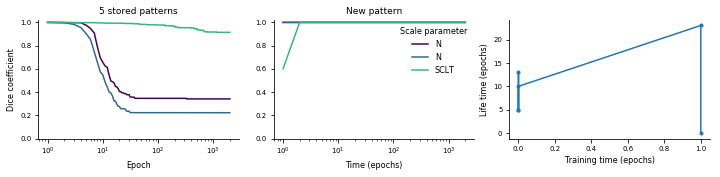

In [11]:
plt.figure(figsize=(10,2.5))

colors = plt.cm.viridis(np.arange(len(data.keys()[1::2]))/len(data.keys()[1::2]))
for j, k in enumerate(data.keys()[1::2]):
    mean_over_p = np.mean(data[k][:, :, :-1],axis = 2)
    mean_over_trials = np.mean(mean_over_p,axis = 0)
    plt.subplot(131)
    plt.semilogx(np.arange(1,len(mean_over_trials)+1),mean_over_trials, c=colors[j])
    
    mean_over_p = data[k][:, :, -1]
    mean_over_trials = np.mean(mean_over_p,axis = 0)
    plt.subplot(132)
    plt.semilogx(np.arange(1,len(mean_over_trials)+1),mean_over_trials, c=colors[j])

plt.subplot(131)
plt.tight_layout()
plt.ylim((0,1.02))
plt.xlabel('Epoch')
plt.ylabel('Dice coefficient')
plt.title('5 stored patterns')

plt.subplot(132)
plt.tight_layout()
plt.ylim((0,1.02))
plt.xlabel('Time (epochs)')
plt.title('New pattern')

dt = np.zeros((len(data.keys()), 2))
for j, k in enumerate(data.keys()):
    mean_over_p = np.mean(data[k][:, :, :-1],axis = 2)
    mean_over_trials = np.mean(mean_over_p,axis = 0)
    t = np.where(mean_over_trials<0.5)[0]
    if len(t)>0:
        dt[j,0] = t[0]
    mean_over_p = data[k][:, :, -1]
    mean_over_trials = np.mean(mean_over_p,axis = 0)
    t = np.where(mean_over_trials>0.99)[0]
    if len(t)>0:
        dt[j,1] = t[0]

plt.legend([k[k.rfind('_')+1:] for k in data.keys()[1::2]], title="Scale parameter")

plt.subplot(133)
# plt.semilogy((10,20,30,40),dt[:,0], label='lifetime\nstored patterns')
# plt.semilogy((10,20,30,40),dt[:,1], label='training\ntime new pattern')
plt.plot(dt[:,1],dt[:,0],'.-')#, label='training\ntime new pattern')
plt.ylabel('Life time (epochs)')
plt.xlabel('Training time (epochs)')
plt.legend()
from scipy.stats import linregress
linregress(dt[1:,1],dt[1:,0])

In [6]:
show_exps

range(0, 6)

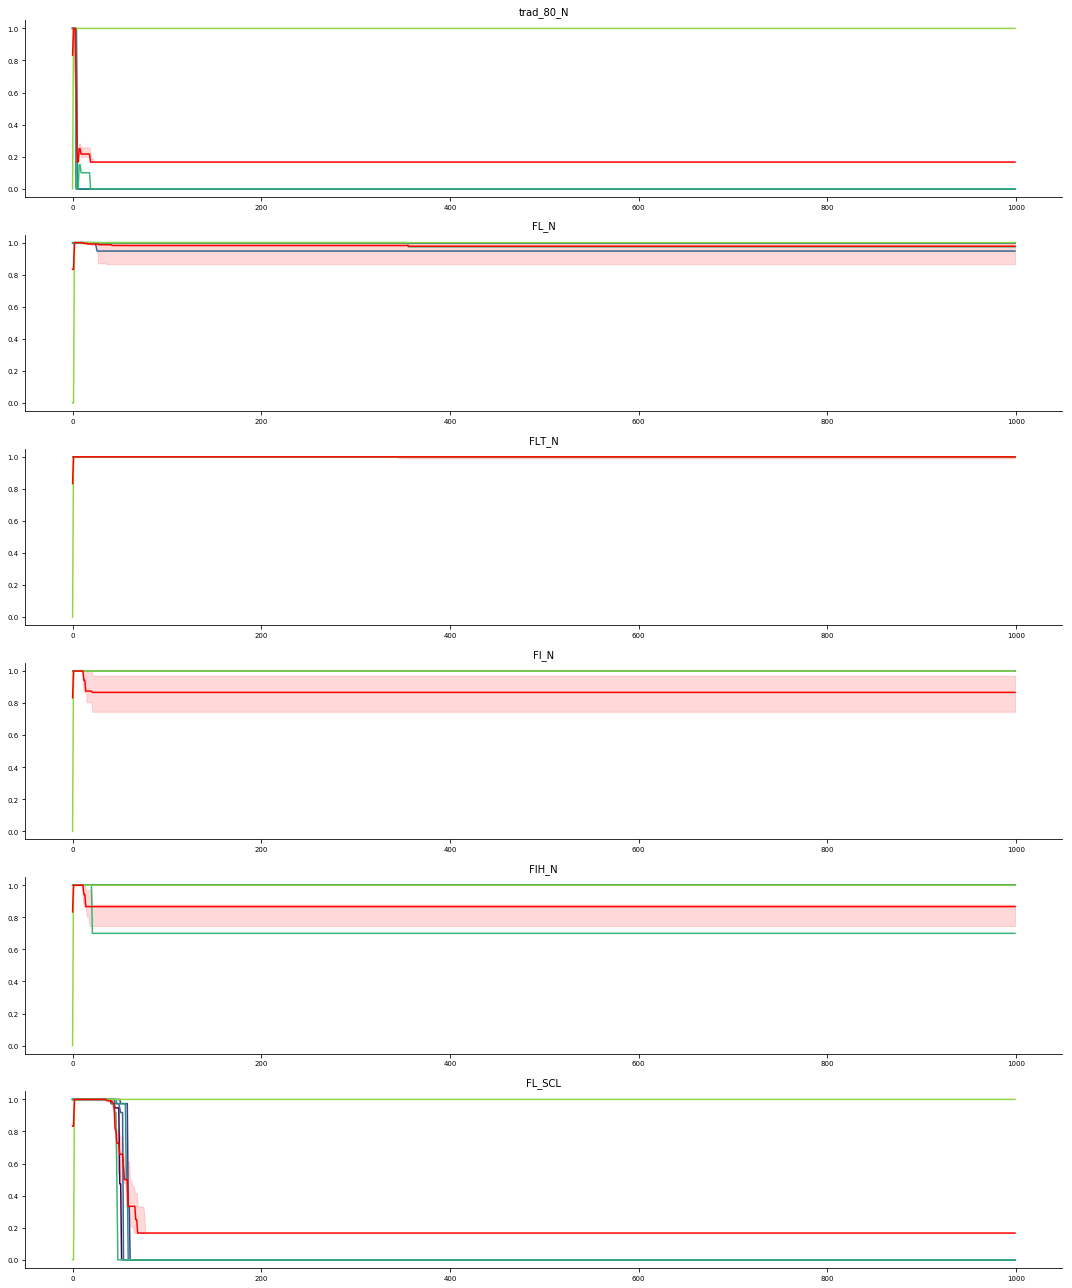

In [163]:
plt.figure(figsize=(15, len(data.keys())*3))
for j, k in enumerate(data.keys()):
    plt.subplot(len(data.keys()), 1, j+1)
    plt.title(k)
    center = np.median(data[k], axis=0)
    n = center.shape[-1]
    for i, p in enumerate(center.T):
        plt.plot(p, c=plt.cm.viridis(i/n))
    plt.plot(np.median(data[k].mean(-1), axis=0), c='r')
    edges = np.percentile(data[k].mean(-1), [25, 75], axis=0)
    plt.fill_between(np.arange(len(center)), *edges, alpha=.15, color='r')
plt.tight_layout()

Text(0,0.5,'Dice coefficient')

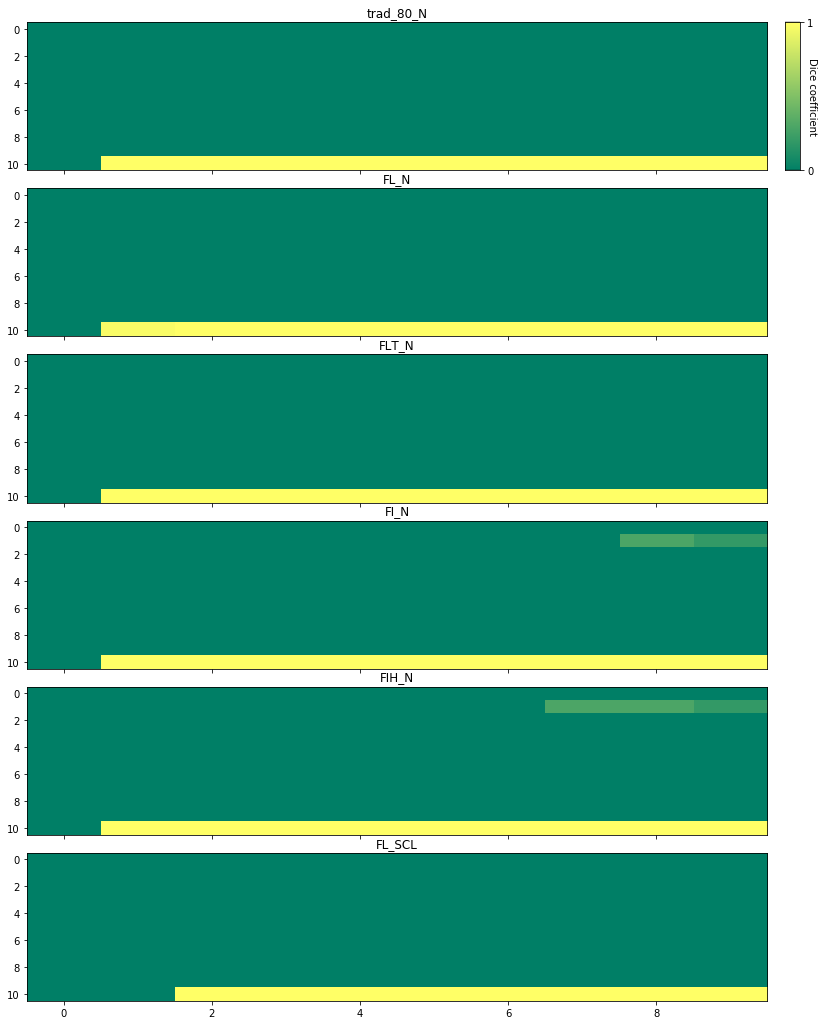

In [22]:
from mpl_toolkits.axes_grid1 import ImageGrid

# Set up figure and image grid
fig = plt.figure(figsize=(15, len(data.keys())*3))

ax = ImageGrid(fig, 111,
                 nrows_ncols=(len(data.keys()), 1),
                 axes_pad=0.25,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="each",
                 cbar_size="2%",
                 cbar_pad=0.25,
                 )

for j, k in enumerate(data.keys()):
    ax[j].set_title(k)
    center = np.median(data[k], axis=0)
    n,m = center.shape
    # blank out lower triangle:
#     inds = [[(x,y) for x in range(n) if x<n/m*y] for y in range(m)]
#     for i in inds:
#         for j in i:
#             center[j]=0
    im = ax[j].imshow(center.T,cmap=plt.cm.summer,aspect=0.2*n/m,vmin=0,vmax=1)
    ax[j].cax.set_visible(False)

    
ax[0].cax.set_visible(True)
ax[0].cax.colorbar(im)
ax[0].cax.toggle_label(True)
ax[0].cax.set_yticks((0,1))
ax[0].cax.set_ylabel('Dice coefficient', rotation=270)